# Pandas Basic Steps

I recommend using venv to set up virtual environments. These are isolated Python installations and then you won't run into conflicts there.

To setup, type "python3 -m venv <envname>". To activate type ". <envname>/bin/activate" (the "." reads the contents into the shell which sets up the proper environment variables.) If you want to leave type "deactivate".

First, let us cover some basics of the pandas library. It's main data structure is a DataFrame, essentially a collection of columns of data, and a dedicated index which defines how rows are identified.

Prior to running this, install pandas, numpy, and matplotlib. To see this notebook, install jupyter. Then, go to this directory and type "jupyter notebook" and you can open the notebook.

Execute lines by shift+Return.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

## Basic Data Frame operations

Setting up a data frame by specifying colums and the index as separate arrays.

There are other ways, consult the excellent documentation at http://pandas.pydata.org/pandas-docs/stable/ !

In [2]:
x = pd.DataFrame({'Min': [3.2, 2.1, 7.4, 5.2, 3.9, 0.7], 
                  'Max': [5.3, 3.7, 11.2, 8.1, 9.2, 3.2], 
                  'Avg': [4.7, 3.0, 8.1, 7.2, 5.1, 1.8]},
                    index=[datetime(2017,8,1), datetime(2017,8,2), datetime(2017,8,3), 
                           datetime(2017,8,4), datetime(2017,8,5), datetime(2017,8,6)])

Printing the data frame gives a nice tabular view.

In [3]:
x

,Avg,Max,Min
2017-08-01,4.7,5.3,3.2
2017-08-02,3.0,3.7,2.1
2017-08-03,8.1,11.2,7.4
2017-08-04,7.2,8.1,5.2
2017-08-05,5.1,9.2,3.9
2017-08-06,1.8,3.2,0.7


Often, you want to check whether the dataframe has the right types (especially if loading from a file, etc.), you can do this with the dtypes attribute (not a method call).

In [4]:
# type information
x.dtypes

Avg    float64
Max    float64
Min    float64
dtype: object

Another option is to call the info() method on the DataFrame object.

In [5]:
# information
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2017-08-01 to 2017-08-06
Data columns (total 3 columns):
Avg    6 non-null float64
Max    6 non-null float64
Min    6 non-null float64
dtypes: float64(3)
memory usage: 192.0 bytes


## Accessing colums and rows

We cover the basic access patterns to get individual rows or columns next.

For columns, you can either call the column as an attribute or through indexing.

In [6]:
# accessing columns
x.Max

2017-08-01     5.3
2017-08-02     3.7
2017-08-03    11.2
2017-08-04     8.1
2017-08-05     9.2
2017-08-06     3.2
Name: Max, dtype: float64

In [7]:
x['Avg']

2017-08-01    4.7
2017-08-02    3.0
2017-08-03    8.1
2017-08-04    7.2
2017-08-05    5.1
2017-08-06    1.8
Name: Avg, dtype: float64

For accessing rows, use the loc attribute and index there. If you want an integer index, use the iloc attribute.

In [8]:
# accessing rows
x.loc['2017-08-01']

Avg    4.7
Max    5.3
Min    3.2
Name: 2017-08-01 00:00:00, dtype: float64

In [9]:
x.iloc[0]

Avg    4.7
Max    5.3
Min    3.2
Name: 2017-08-01 00:00:00, dtype: float64

Interestingly, for ranges, you can directly index on the object. Pandas has been built for time series data, so it is quite flexible understanding data specifications. You don't always have to construct a datetime object.

In [10]:
x['2017-08-02':'2017-08-03']

,Avg,Max,Min
2017-08-02,3.0,3.7,2.1
2017-08-03,8.1,11.2,7.4


To extract subsets of columns, index with an array of column names.

In [11]:
x[['Avg', 'Min']]

,Avg,Min
2017-08-01,4.7,3.2
2017-08-02,3.0,2.1
2017-08-03,8.1,7.4
2017-08-04,7.2,5.2
2017-08-05,5.1,3.9
2017-08-06,1.8,0.7


Coming back to ranges, you can use integer indices to access parts of the table. A lot more options exist, refer to the documentation for more information.

In [13]:
x[1:3]

,Avg,Max,Min
2017-08-02,3.0,3.7,2.1
2017-08-03,8.1,11.2,7.4


## Plotting

A very nifty feature of DataFrames is that they can plot themselves. Just call the plot() method on the data frame and it usually produces some form of reasonable representation, especially for time series.

Type the special command "%matplot inline" in jupyter to get plots inline.

In [14]:
%matplotlib inline

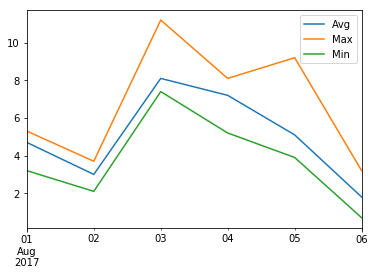

In [15]:
x.plot()

## Missing values

It is quite common that missing values exist, because the data isn't there, or for some other reason.

These missing data points are introduced by putting None into the array, which are then converted to float NaN values for float columns.

In [16]:
# Introducing missing data points into the data
x = pd.DataFrame({'Min': [3.2, 2.1, None, 5.2, 3.9, 0.7], 
                  'Max': [5.3, None, 11.2, 8.1, 9.2, 3.2], 
                  'Avg': [4.7, 3.0, 8.1, 7.2, 5.1, 1.8]},
                    index=[datetime(2017,8,1), datetime(2017,8,2), datetime(2017,8,3), 
                           datetime(2017,8,4), datetime(2017,8,5), datetime(2017,8,6)])

In [17]:
x

,Avg,Max,Min
2017-08-01,4.7,5.3,3.2
2017-08-02,3.0,NaN,2.1
2017-08-03,8.1,11.2,NaN
2017-08-04,7.2,8.1,5.2
2017-08-05,5.1,9.2,3.9
2017-08-06,1.8,3.2,0.7


Most arithmetic operations cannot deal with missing values, so one missing value can taint the whole computation and you get nothing but nan out.

Pandas comes with a number of options to deal with this.

The first option is to just drop columns or rows which contain any missing value.

In [20]:
# removing rows with missing values
x.dropna() # alternatively, use axis=0

,Avg,Max,Min
2017-08-01,4.7,5.3,3.2
2017-08-04,7.2,8.1,5.2
2017-08-05,5.1,9.2,3.9
2017-08-06,1.8,3.2,0.7


In [21]:
# remove columns which have missing data
x.dropna(axis=1)

,Avg
2017-08-01,4.7
2017-08-02,3.0
2017-08-03,8.1
2017-08-04,7.2
2017-08-05,5.1
2017-08-06,1.8


Another option is to fill the missing values, either by a specific value, or by providing a method, for example by filling the last non-missing value forward or backwards.

In [22]:
x.fillna(0.0)

,Avg,Max,Min
2017-08-01,4.7,5.3,3.2
2017-08-02,3.0,0.0,2.1
2017-08-03,8.1,11.2,0.0
2017-08-04,7.2,8.1,5.2
2017-08-05,5.1,9.2,3.9
2017-08-06,1.8,3.2,0.7


In [23]:
x.fillna(method='pad')

,Avg,Max,Min
2017-08-01,4.7,5.3,3.2
2017-08-02,3.0,5.3,2.1
2017-08-03,8.1,11.2,2.1
2017-08-04,7.2,8.1,5.2
2017-08-05,5.1,9.2,3.9
2017-08-06,1.8,3.2,0.7


In [24]:
x.fillna(method='bfill')

,Avg,Max,Min
2017-08-01,4.7,5.3,3.2
2017-08-02,3.0,11.2,2.1
2017-08-03,8.1,11.2,5.2
2017-08-04,7.2,8.1,5.2
2017-08-05,5.1,9.2,3.9
2017-08-06,1.8,3.2,0.7


## Resampling

You'll often find that you want to change the frequency of time series, both up and down. Pandas comes with two functions for that: asfreq() which changes the frequency, but introduces NaNs or discards values, and a more flexible resample() function which allows you to specify how the resampling should be done by providing how resamples should be aggregated.

In [25]:
# resample to a specific time
# we don't have a lot of data, but let's use two days
x.asfreq('12H')

,Avg,Max,Min
2017-08-01 00:00:00,4.7,5.3,3.2
2017-08-01 12:00:00,NaN,NaN,NaN
2017-08-02 00:00:00,3.0,NaN,2.1
2017-08-02 12:00:00,NaN,NaN,NaN
2017-08-03 00:00:00,8.1,11.2,NaN
2017-08-03 12:00:00,NaN,NaN,NaN
2017-08-04 00:00:00,7.2,8.1,5.2
2017-08-04 12:00:00,NaN,NaN,NaN
2017-08-05 00:00:00,5.1,9.2,3.9
2017-08-05 12:00:00,NaN,NaN,NaN


In [26]:
x.asfreq('2D')

,Avg,Max,Min
2017-08-01,4.7,5.3,3.2
2017-08-03,8.1,11.2,NaN
2017-08-05,5.1,9.2,3.9


In [27]:
# resample returns a resampling object that has an aggregate method
x.resample('2D')

DatetimeIndexResampler [freq=<2 * Days>, axis=0, closed=left, label=left, convention=start, base=0]

In [28]:
x.resample('2D').agg(np.min)

,Avg,Max,Min
2017-08-01,3.0,5.3,2.1
2017-08-03,7.2,8.1,5.2
2017-08-05,1.8,3.2,0.7


In [29]:
x.resample('2D').asfreq()

,Avg,Max,Min
2017-08-01,4.7,5.3,3.2
2017-08-03,8.1,11.2,NaN
2017-08-05,5.1,9.2,3.9


In [30]:
x.resample('12H').ffill()

,Avg,Max,Min
2017-08-01 00:00:00,4.7,5.3,3.2
2017-08-01 12:00:00,4.7,5.3,3.2
2017-08-02 00:00:00,3.0,NaN,2.1
2017-08-02 12:00:00,3.0,NaN,2.1
2017-08-03 00:00:00,8.1,11.2,NaN
2017-08-03 12:00:00,8.1,11.2,NaN
2017-08-04 00:00:00,7.2,8.1,5.2
2017-08-04 12:00:00,7.2,8.1,5.2
2017-08-05 00:00:00,5.1,9.2,3.9
2017-08-05 12:00:00,5.1,9.2,3.9
